In [1]:
import numpy as np
import h5py
import os,pickle
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splinalg

from es_appm_445_2019.utils import get_A,get_rhs,get_init,iter_solve,residual
from es_appm_445_2019.red_black_utils import convert_vec_to_rb,convert_mat_to_rb
from es_appm_445_2019.jacobi import jacobi
from es_appm_445_2019.weighted_jacobi import weighted_jacobi
from es_appm_445_2019.gauss_sidel import gauss_sidel
from es_appm_445_2019.sor import sor
from es_appm_445_2019.ssor import ssor

In [2]:
w_sor  = pickle.load(open('w_sor.pickle','rb'))
w_ssor = pickle.load(open('w_ssor.pickle','rb'))
w_wj   = pickle.load(open('w_wj.pickle','rb'))


meth_dict = {}

In [3]:
meth_dict[1] = 'jacobi'
meth_dict[2] = 'weighted_jacobi'
meth_dict[3] = 'gauss_sidel'
meth_dict[4] = 'red_black_gauss_sidel'
meth_dict[5] = 'sym_gauss_sidel'
meth_dict[6] = 'sor'
meth_dict[7] = 'ssor'

N :  16  K :  -2 [539. 547. 271. 279. 140.  59.  50.] 

N :  16  K :  -1 [718. 729. 360. 372. 185.  67.  60.] 

N :  16  K :  0 [1089. 1095.  546.  565.  279.   75.   78.] 

N :  16  K :  1 [2358. 3542. 1181. 1226.  601.  101.  161.] 

N :  16  K :  2 [7500. 7500. 7500. 7500. 7500. 7500. 7500.] 

N :  32  K :  -2 [2102. 2112. 1052. 1088.  530.  125.  100.] 

N :  32  K :  -1 [2782. 2796. 1393. 1441.  701.  143.  118.] 

N :  32  K :  0 [4153. 4174. 2078. 2154. 1046.  149.  156.] 

N :  32  K :  1 [7500. 7500. 4218. 4380. 2120.  435.  325.] 

N :  32  K :  2 [7500. 7500. 7500. 7500. 7500. 7500. 7500.] 

N :  64  K :  -2 [7500. 7500. 4151. 4296. 2080.  264.  187.] 

N :  64  K :  -1 [7500. 7500. 5473. 5668. 2742.  264.  228.] 

N :  64  K :  0 [7500. 7500. 7500. 7500. 4055.  263.  318.] 

N :  64  K :  1 [7500. 7500. 7500. 7500. 7500. 1742.  969.] 

N :  64  K :  2 [7500. 7500. 7500. 7500. 7500. 7500. 7500.] 



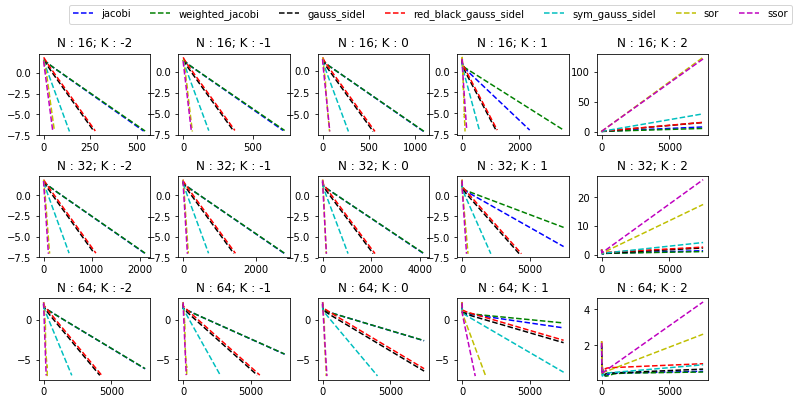

In [4]:
init = 3

its1 = np.zeros(7)
its2 = np.zeros(7)

its = 7500

plt.rcParams["figure.figsize"] = (20,15)
fig,axarr = plt.subplots(3,5)
for i in [0,1,2]:
    for j in [0,1,2,3,4]:
        n = 2**(i+4)
        k = (j-2)

        A = get_A(n,k) 
        b = get_rhs(n)
        x = get_init(n,init)
        
        for m in np.arange(1,8):
            if m==1:
                meth = jacobi
                G,b1 = meth(A,b)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)
                r1 = r
            if m==2:
                meth = weighted_jacobi
                if k>0:
                    w = 2/3
                else:
                    w = w_wj[str(n)+'_'+str(k)]
                G,b1 = meth(A,b,w)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)
                r2 = r
            if m==3:
                meth = gauss_sidel
                G,b1 = meth(A,b)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)
                r3 = r
            if m==4:
                meth = gauss_sidel
                x_ = convert_vec_to_rb(x,n)
                b_ = convert_vec_to_rb(b,n)
                A_ = convert_mat_to_rb(A,n)
                G,b1 = meth(A_,b_)
                y,r = iter_solve(G,b1,A_,b_,x_,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)
                r4 = r
            if m==5:
                meth = ssor
                w = 1
                G,b1 = meth(A,b,w)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)*2
                r5 = r
            if m==6:
                meth = sor
                if k>0:
                    w = 1.8
                else:
                    w = w_sor[str(n)+'_'+str(k)]
                G,b1 = meth(A,b,w)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)
                r6 = r
            if m==7:
                meth = ssor
                if k>0:
                    w = 1.8
                else:
                    w = w_ssor[str(n)+'_'+str(k)]
                G,b1 = meth(A,b,w)
                y,r = iter_solve(G,b1,A,b,x,its,1e-7,use_tqdm=False)
                its1[m-1] = len(r)
                its2[m-1] = len(r)*2
                r7 = r

        
        
        l1, = axarr[i,j].plot(np.log10(r1),'b--')
        l2, = axarr[i,j].plot(np.log10(r2),'g--')
        l3, = axarr[i,j].plot(np.log10(r3),'k--')
        l4, = axarr[i,j].plot(np.log10(r4),'r--')
        l5, = axarr[i,j].plot(np.log10(r5),'c--')
        l6, = axarr[i,j].plot(np.log10(r6),'y--')
        l7, = axarr[i,j].plot(np.log10(r7),'m--')
        axarr[i,j].set_title("N : "+str(n)+"; K : "+str(k))
        axarr[i,j].title.set_y(1.01)
        #axarr[i,j].set_ylim(-8,8)
        print('N : ',n,' K : ',k,its1,'\n')
        
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.25)
fig.set_size_inches(12, 6, forward=True)
fig.legend((l1,l2,l3,l4,l5,l6,l7),('jacobi','weighted_jacobi','gauss_sidel','red_black_gauss_sidel','sym_gauss_sidel','sor','ssor'), ncol=7 )
plt.show()